In [1]:
import pandas as pd

In [2]:
import os
os.chdir("/project/work/Passenger_Demand")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
%%time
card_401 = pd.read_parquet('model_mr/card_401.parquet', engine='pyarrow')

CPU times: user 6.75 s, sys: 24.6 s, total: 31.4 s
Wall time: 8.63 s


In [5]:
card_401.head(10)

,collectdate,seq,route_nm,transdate,sumamount,stop_nm_x,mybi_stop_id,normalcnt,studentcnt,studentamount,childcnt,childamount,transflag,mybicardnumber,base_ymd,dayofweek,day,month,hour,totalcnt,stop_id,direction,longitude,latitude,stop_nm_y,market_lv2_0,market_lv2_1,market_lv2_2,market_lv2_3,market_lv2_4,market_lv2_5,market_lv2_6,market_lv2_7,market_lv2_8,market_lv2_9,market_lv2_10,market_lv2_11,market_lv2_12,market_lv2_13,market_lv2_14,market_lv2_15,market_lv2_16,market_lv2_17,market_lv2_18,market_lv2_19,market_lv2_20,market_lv2_21,market_lv2_22,market_lv2_23,market_lv2_24,market_lv2_25,market_lv2_26,market_lv2_27,market_lv2_28,market_lv2_29,market_lv2_30,market_lv2_31,market_lv2_32,market_lv2_33,market_lv2_34,market_lv2_35,market_lv2_36,market_lv2_37,market_lv2_38,market_lv2_39,market_lv2_40,market_lv2_41,market_lv2_42,market_lv2_43,market_lv2_44,market_lv2_45,market_lv2_46,market_lv2_47,market_lv2_48,market_lv2_49,market_lv2_50,market_lv2_51,market_lv2_52,market_lv2_53,market_lv2_54,market_lv2_55,market_lv2_56,market_lv2_57,market_lv2_58,market_lv2_59,market_lv2_60,market_lv2_61,market_lv2_62,market_lv2_63,market_lv2_64,market_lv2_65,market_lv2_66,market_lv2_67,market_lv2_68,market_lv2_69,market_lv2_70,market_lv2_71,market_lv2_72,market_lv2_73,market_lv2_74,market_lv2_75,market_lv2_76,market_lv2_77,market_lv2_78,market_lv2_79,market_lv2_80,market_lv2_81,market_lv2_82,market_lv2_83,market_lv2_84,market_lv2_85,market_lv2_86,market_lv2_87,market_lv2_88,market_lv2_89,hospital_lv1_0,hospital_lv1_1,hospital_lv1_2,hospital_lv1_3,hospital_lv1_4,hospital_lv1_5,hospital_lv1_6,hospital_lv1_7,hospital_lv1_8,hospital_lv1_9,hospital_lv1_10,hospital_lv1_11,hospital_lv1_12,hospital_lv1_13,hospital_lv0,market_lv0
0,2020-04-07,165242,401,2020-04-08 00:02:42,1250,옥동초등학교,3101416,1,0,0,0,0,비환승,D900508462186,20200408,수,8,4,0,1,40610,2,129.29724,35.534136,옥동초등학교,8,15,0,13,1,0,7,0,5,15,5,25,2,0,0,1,2,3,0,6,6,1,14,12,3,8,0,6,12,1,1,1,0,1,5,6,0,0,2,0,2,0,0,2,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,6,0,1,1,0,0,0,10,203
1,2020-04-08,130625,401,2020-04-08 06:30:06,1250,옥동초등학교,3101416,1,0,0,0,0,비환승,D900578762751,20200408,수,8,4,6,1,40610,2,129.29724,35.534136,옥동초등학교,8,15,0,13,1,0,7,0,5,15,5,25,2,0,0,1,2,3,0,6,6,1,14,12,3,8,0,6,12,1,1,1,0,1,5,6,0,0,2,0,2,0,0,2,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,6,0,1,1,0,0,0,10,203
2,2020-04-08,121407,401,2020-04-08 07:54:00,820,옥동초등학교,3101416,1,0,0,0,0,비환승,D900600754901,20200408,수,8,4,7,1,40610,2,129.29724,35.534136,옥동초등학교,8,15,0,13,1,0,7,0,5,15,5,25,2,0,0,1,2,3,0,6,6,1,14,12,3,8,0,6,12,1,1,1,0,1,5,6,0,0,2,0,2,0,0,2,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,6,0,1,1,0,0,0,10,203
3,2020-04-08,7985,401,2020-04-08 07:54:03,1250,옥동초등학교,3101416,1,0,0,0,0,비환승,D900614933244,20200408,수,8,4,7,1,40610,2,129.29724,35.534136,옥동초등학교,8,15,0,13,1,0,7,0,5,15,5,25,2,0,0,1,2,3,0,6,6,1,14,12,3,8,0,6,12,1,1,1,0,1,5,6,0,0,2,0,2,0,0,2,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,6,0,1,1,0,0,0,10,203
4,2020-04-08,170290,401,2020-04-08 08:20:47,1250,옥동초등학교,3101416,1,0,0,0,0,비환승,D900387254275,20200408,수,8,4,8,1,40610,2,129.29724,35.534136,옥동초등학교,8,15,0,13,1,0,7,0,5,15,5,25,2,0,0,1,2,3,0,6,6,1,14,12,3,8,0,6,12,1,1,1,0,1,5,6,0,0,2,0,2,0,0,2,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,6,0,1,1,0,0,0,10,203
5,2020-04-08,40520,401,2020-04-08 08:20:49,0,옥동초등학교,3101416,1,0,0,0,0,환승,D900576208781,20200408,수,8,4,8,1,40610,2,129.29724,35.534136,옥동초등학교,8,15,0,13,1,0,7,0,5,15,5,25,2,0,0,1,2,3,0,6,6,1,14,12,3,8,0,6,12,1,1,1,0,1,5,6,0,0,2,0,2,0,0,2,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,6,0,1,1,0,0,0,10,203
6,2020-04-08,28307,401,2020-04-08 08:21:43,1250,옥동초등학교,3101416,1,0,0,0,0

In [6]:
card_401_1 = card_401[card_401['direction']=='1'].copy()
card_401_2 = card_401[card_401['direction']=='2'].copy()

In [7]:
a = card_401_1.groupby(['mybi_stop_id', 'month', 'day', 'hour']).count().copy()

In [8]:
a.sort_values('seq', ascending=False).head(5)

collectdate  seq  route_nm  transdate  sumamount  \
mybi_stop_id month day hour                                                     
3101450      7     5   21             93   93        93         93         93   
             11    8   21             89   89        89         89         89   
             7     26  21             87   87        87         87         87   
             10    31  21             84   84        84         84         84   
3101504      11    3   16             83   83        83         83         83   

                             stop_nm_x  normalcnt  studentcnt  studentamount  \
mybi_stop_id month day hour                                                    
3101450      7     5   21           93         93          93             93   
             11    8   21           89         89          89             89   
             7     26  21           87         87          87             87   
             10    31  21           84         84          84             84   
3101504      11    3   16           83         83          83             83   

                             childcnt  childamount  transflag  mybicardnumber  \
mybi_stop_id month day hour                                                     
3101450      7     5   21          93           93         93              93   
             11    8   21          89           89         89              89   
             7     26  21          87           87         87              87   
             10    31  21          84           84         84              84   
3101504      11    3   16          83           83         83              83   

                             base_ymd  dayofweek  totalcnt  stop_id  \
mybi_stop_id month day hour                                           
3101450      7     5   21          93         93        93       93   
             11    8   21          89         89        89       89   
             7     26  21          87         87        87       87   
             10    31  21          84         84        84       84   
3101504      11    3   16          83         83        83       83   

                             direction  longitude  latitude  stop_nm_y  \
mybi_stop_id month day hour                                              
3101450      7     5   21           93         93        93         93   
             11    8   21           89         89        89         89   
             7     26  21           87         87        87         87   
             10    31  21           84         84        84         84   
3101504      11    3   16           83         83        83         83   

                             market_lv2_0  market_lv2_1  market_lv2_2  \
mybi_stop_id month day hour                                             
3101450      7     5   21              93            93            93   
             11    8   21              89            89            89   
             7     26  21              87            87            87   
             10    31  21              84            84            84   
3101504      11    3   16              83            83            83   

                             market_lv2_3  market_lv2_4  market_lv2_5  \
mybi_stop_id month day hour                                             
3101450      7     5   21              93            93            93   
             11    8   21              89            89            89   
             7     26  21              87            87            87   
             10    31  21              84            84            84   
3101504      11    3   16              83            83            83   

                             market_lv2_6  market_lv2_7  market_lv2_8  \
mybi_stop_id month day hour                                             
3101450      7     5   21              93            93            93   
             11    8   21              89            89            89   

In [9]:
b = card_401_1[(card_401_1['month']==11) & (card_401_1['day']==8) & (card_401_1['hour']==21) & (card_401_1['mybi_stop_id']==3101450)]

In [10]:
import seaborn as sns

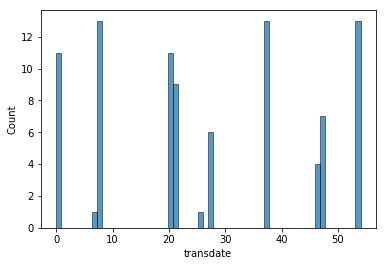

In [11]:
sns.histplot(b['transdate'].dt.minute, bins=60)

In [12]:
b['transdate'].dt.minute[41:42]//2 + 1

1112238    11
Name: transdate, dtype: int64

In [13]:
card_401_1.shape

(1024227, 131)

In [18]:
card_401_1a = card_401_1.reset_index().copy()

In [25]:
card_401_1a['min_inteval'] = card_401_1a['transdate'].apply(lambda x: (x.minute) // 10 + 1, 1)

In [28]:
card_401_1a.groupby(['mybi_stop_id', 'month', 'day', 'hour', 'min_inteval']).count()

index  collectdate  seq  route_nm  \
mybi_stop_id month day hour min_inteval                                      
3100057      4     8   6    4                3            3    3         3   
                            5                1            1    1         1   
                       9    1                1            1    1         1   
                       10   2                1            1    1         1   
                       11   4                1            1    1         1   
                       14   2                1            1    1         1   
                            4                1            1    1         1   
                            5                1            1    1         1   
                       15   4                2            2    2         2   
                            5                1            1    1         1   
                            6                1            1    1         1   
                       16   2                1            1    1         1   
                       21   3                1            1    1         1   
                       23   1                1            1    1         1   
                   9   5    6                1            1    1         1   
                       6    3                1            1    1         1   
                       15   4                4            4    4         4   
                            5                4            4    4         4   
                       17   1                1            1    1         1   
                       20   4                1            1    1         1   
                       22   6                1            1    1         1   
                   10  6    3                1            1    1         1   
                            4                1            1    1         1   
                       7    2                2            2    2         2   
                       10   1                1            1    1         1   
                       13   2                1            1    1         1   
                            4                1            1    1         1   
                       14   6                1            1    1         1   
                       15   4                7            7    7         7   
                            5                1            1    1         1   
...                                        ...          ...  ...       ...   
3102806      11    30  13   4                1            1    1         1   
                       14   1                1            1    1         1   
                            2                1            1    1         1   
                            3                1            1    1         1   
                            5                3            3    3         3   
                       15   2                1            1    1         1   
                            4                1            1    1         1   
                            5                4            4    4         4   
                       16   1                2            2    2         2   
                            2                1            1    1         1   
                            4                1            1    1         1   
                            6                1            1    1         1   
                       17   1                5            5    5         5   
                            4                3            3    3         3   
                            5                2            2    2         2   
                            6                2            2    2         2   
                       18   2                5            5    5         5   
                            3                2            2    2         2   
                            6                1            1    

In [ ]:
x_col = ['transdate', 'normalcnt', 'studentcnt', 'studentamount', 'childcnt', 'childamount', '']

In [ ]:
data_preprocessing = card_401_1[['collectdate']]